**Integrantes:**
- Freddy Abad
- Edisson Reinozo

Este taller se desarrollo en Google Colab, si desea revisarlo, esta disponible en el siguiente link:
https://colab.research.google.com/drive/13ce0ZRGytvovk3kNMy7NAffzzRm2A0ai?usp=sharing

# Sesión 2

Esta sesión estará centrada mayormente en el análisis de distancias/similitudes entre textos; además, en cómo realizar extracción de información en base a consultas.

Lineamientos generales:
- Responder a detalle las preguntas planteadas a lo largo del este documento
- Sólo mostrar en pantalla los resultados finales (los resultados intermedios no deberán mostrarse, ya que no son informativos)
- Si cuando corre su código obtiene cientos de líneas de warnings, deberá confirugar su notebook para que no muestre estos mensajes (esto dificulta tremendamente la revisión de los trabajos)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1

Considerando una representación vectorial de los siguientes documentos:

`docA = [0, 2, 3, 1]`<br>
`docB = [1, 2, 3, 5]`<br>
`docC = [1, 1, 2, 2]`<br>

y una consulta `query = [1, 1, 3, 4]`

Calcule la distancia entre la consulta `query` y cada uno de los documentos usando las siguientes distancias:

- euclidiana ($d_e$)
- coseno ($d_c$)
- pearson correlation $d_r$

Todas las distancias deberán ser implementadas manualmente en base a las siguientes formulaciones:
- $d_e = \sqrt { \sum_{i=1}^{n} (x_i - y_i)^2 }$
- $d_c = \frac { \sum_{i=1}^{n} x_i y_i} { \sqrt {\sum_{i=1}^{n} x_i^2} \sqrt {\sum_{i=1}^{n}} y_i^2}$
- $d_r = \frac {\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)} { \sqrt{\sum_{i=1}^{n} (x_i - \bar x)^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar y)^2} }$

In [ ]:
# implemente su código aquí
import numpy as np

docA = [0, 2, 3, 1]
docB = [1, 2, 3, 5]
docC = [1, 1, 2, 2]

query = [1, 1, 3, 4]


# Distancia euclidiana
def distancia_euclidiana(doc, query):
    sum = 0

    for i in range(len(doc)):
        sum += (doc[i] - query[i]) ** 2
    
    return np.sqrt(sum)


# Distancia coseno
def distancia_coseno(doc, query):
    sum_doc_query  = 0

    for i in range(len(doc)):
        sum_doc_query += (doc[i] * query[i])
  

    sum_doc_squeared = np.sqrt(np.sum(np.square(doc)))
    sum_query_squeared = np.sqrt(np.sum(np.square(query)))

    return (sum_doc_query) / (sum_doc_squeared * sum_query_squeared)


# Correlación de Pearson
def correlacion_pearson(doc, query):
    doc_mean =  np.mean(doc)
    query_mean = np.mean(query)

    sum_1 = 0
    for i in range(len(doc)):
        sum_1 += (doc[i] - doc_mean)*(query[i] - query_mean)
  
    sum_2 = 0
    for i in range(len(doc)):
        sum_2 += (doc[i] - doc_mean) ** 2
    sum_2 =  np.sqrt(sum_2)

    sum_3 = 0
    for i in range(len(query)):
        sum_3 += (query[i] - query_mean) ** 2
    sum_3 =  np.sqrt(sum_3)

    return sum_1 / (sum_2 * sum_3)

In [ ]:
# Distancia euclidiana
print('Distancia euclidiana')
print('query - docA: ', distancia_euclidiana(docA, query))
print('query - docB: ', distancia_euclidiana(docB, query))
print('query - docC: ', distancia_euclidiana(docC, query))

# Distancia coseno
print('\nDistancia coseno')
print('query - docA: ', distancia_coseno(docA, query))
print('query - docB: ', distancia_coseno(docB, query))
print('query - docC: ', distancia_coseno(docC, query))

# Correlación de Pearson
print('\nCorrelación de Pearson')
print('query - docA: ', correlacion_pearson(docA, query))
print('query - docB: ', correlacion_pearson(docB, query))
print('query - docC: ', correlacion_pearson(docC, query))



Distancia euclidiana
query - docA:  3.3166247903554
query - docB:  1.4142135623730951
query - docC:  2.23606797749979

Distancia coseno
query - docA:  0.7715167498104595
query - docB:  0.9861336821781851
query - docC:  0.9737289911202951

Correlación de Pearson
query - docA:  0.2581988897471611
query - docB:  0.9433700705169153
query - docC:  0.9622504486493763


Realice los mismos cálculos del punto anterior, pero esta vez utilice los siguientes paquetes `sklearn.metrics.pairwise.euclidean_distances` ($d_e$), `sklearn.metrics.pairwise.cosine_similarity` ($d_c$), y `scipy import stats.pearsonr` ($d_r$). Nota: Los resultados deberían ser los mismos.

In [ ]:
docA = [0, 2, 3, 1]
docB = [1, 2, 3, 5]
docC = [1, 1, 2, 2]
query = [1, 1, 3, 4]
# implemente su código aquí
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
from scipy.stats.stats import pearsonr

# Distancia euclidiana
print('Distancia euclidiana')
print('query - docA: ', euclidean_distances([docA], [query])[0][0])
print('query - docB: ', euclidean_distances([docB], [query])[0][0])
print('query - docC: ', euclidean_distances([docC], [query])[0][0])
# Distancia coseno
print('\nDistancia coseno')
print('query - docA: ', cosine_similarity([docA], [query])[0][0])
print('query - docB: ', cosine_similarity([docB], [query])[0][0])
print('query - docC: ', cosine_similarity([docC], [query])[0][0])
# Correlación de Pearson
print('\nCorrelación de Pearson')
print('query - docA: ', stats.pearsonr(docA, query)[0])
print('query - docB: ', stats.pearsonr(docB, query)[0])
print('query - docC: ', stats.pearsonr(docC, query)[0])

Distancia euclidiana
query - docA:  3.3166247903554
query - docB:  1.4142135623730951
query - docC:  2.23606797749979

Distancia coseno
query - docA:  0.7715167498104596
query - docB:  0.9861336821781851
query - docC:  0.9737289911202953

Correlación de Pearson
query - docA:  0.2581988897471611
query - docB:  0.9433700705169155
query - docC:  0.9622504486493761


¿Cuales es el rankeo de documentos usando las distintas medidas de distancia?

Si se ranquea basado en que mientras más similar es un documento es mejor. Entonces debemos ranquear de menor a mayor:

*Distancia euclidiana:*

query - docB:  1.4142135623730951

query - docC:  2.23606797749979

query - docA:  3.3166247903554



*Distancia coseno:*

query - docA:  0.7715167498104595

query - docC:  0.9737289911202951 

query - docB:  0.9861336821781851



*Correlación de Pearson:*

query - docA:  0.2581988897471611

query - docB:  0.9433700705169153

query - docC:  0.9622504486493763


<br>

Se puede observar que el orden de los documentos **NO** es el mismo utilizando las distintas distancias.

## Ejercicio 2

El código a continuación extrae el contenido de 10 páginas web. El contenido de estas páginas, luego de todo este proces, es únicamente una lista con los textos en claro.

In [ ]:
import re
import string
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer

def retrieve_docs_and_clean():
    r = requests.get('https://www.nme.com/?s=muse')
    soup = BeautifulSoup(r.content, 'html.parser')

    link = []
    for i in soup.find('div', {'class': 'td_block_inner tdb-block-inner td-fix-index'}).find_all('a'):
        i['href'] = i['href'] + '?page=all'
        link.append(i['href'])

    link = list(np.unique(link))

    # Retrieve Paragraphs
    documents = []
    for i in link:
        r = requests.get(i)
        soup = BeautifulSoup(r.content, 'html.parser')

        sen = []
        for i in soup.find_all('p'):
            sen.append(i.text)
        documents.append(' '.join(sen))

    # Clean Paragraphs
    documents_clean = []
    for d in documents:
        document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
        document_test = re.sub(r'@\w+', '', document_test)
        document_test = document_test.lower()
        document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
        document_test = re.sub(r'[0-9]', '', document_test)
        document_test = re.sub(r'\s{2,}', ' ', document_test)
        documents_clean.append(document_test)

    return documents_clean

docs = retrieve_docs_and_clean()


En base a los documentos encontrados, ejecute los proceso de:
- stop word removal
- representación TF-IDF para los documentos

In [ ]:
# Eliminar stop words

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = set(stopwords.words('english')) 

filtered_docs = []
for doc in docs:
    word_tokens =  doc.split(' ')
    filtered_doc = []   
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_doc.append(w) 
    filtered_docs.append(filtered_doc)

# Transformamos la matriz de tokens a un arreglo de strigs
corpus = []
for filtered_doc in filtered_docs:
    corpus.append(' '.join(filtered_doc))

# print(corpus[0][:100])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names()[:10])

Teniendo como base la representación del punto anterior, calcule la distancia euclidiana y de coseno de los documentos con respecto a las siguientes consultas:
- q1 = 'muse'
- q2 = 'muse nandi'
- q3 = 'muse mcgregor ewan'

Muestre los resultados. ¿Ambas métricas de distancia llegaron a la misma conclusión?. Elabore su respuesta.

Muestre los primeros 400 caracteres del resultado más relevante (usando la distancia de coseno) para cada consulta. ¿Los resultados son relevantes?. Elabore su respuesta.

In [ ]:
# q1 = 'muse'
q1 = 'muse'
query_vector = vectorizer.transform([q1])

# Distancia euclidiana
eucleadian_distances = []
for i in range(10):
    distance = euclidean_distances(X[i], query_vector)
    eucleadian_distances.append(distance[0][0])

min_distance_index = eucleadian_distances.index(min(eucleadian_distances))
print('Distancias euclidianas: ', eucleadian_distances)
print('Doc: ', docs[min_distance_index][:400])

# Similitud de coseno
cosine_distances = []
for i in range(10):
    distance = cosine_similarity(X[i], query_vector)
    cosine_distances.append(distance[0][0])

min_distance_index = cosine_distances.index(min(cosine_distances)) 

print('Distancias euclidianas: ', cosine_distances)
print('Doc: ', docs[min_distance_index][:400])

Distancias euclidianas:  [1.295670733007149, 1.3227231202553762, 1.414213562373095, 1.357419815253989, 1.283216410698004, 1.2681732922870697, 1.3255886190062074, 1.414213562373095, 1.414213562373095, 1.354130117208392]
Doc:  the film will blur the lines between narrative and concert film virtual and reality muse have announced details of their anticipated new live film with simulation theory hitting the imax screen and being released as a special box set later this year see the trailer and details below based on the story and themes of their album simulation theory the movie has been teased as the devonshire trio s ow
Distancias euclidianas:  [0.16061867581435804, 0.1252017735709408, 0.0, 0.07870572257791257, 0.17667782165766582, 0.19586825036488673, 0.12140740658060803, 0.0, 0.0, 0.08316581283459186]
Doc:  the world s defining voice in music and pop culture since nme is a member of the media division of bandlab technologies 


In [ ]:
# q1 = 'muse nandi'
q2 = 'muse nandi'
query_vector = vectorizer.transform([q2])

# Distancia euclidiana
eucleadian_distances = []
for i in range(10):
    distance = euclidean_distances(X[i], query_vector)
    eucleadian_distances.append(distance[0][0])

min_distance_index = eucleadian_distances.index(min(eucleadian_distances)) 
print('Doc: ', docs[min_distance_index][:400])

# Similitud de coseno
cosine_distances = []
for i in range(10):
    distance = cosine_similarity(X[i], query_vector)
    cosine_distances.append(distance)

min_distance_index = cosine_distances.index(min(cosine_distances)) 
print('Doc: ', docs[min_distance_index][:400])

Doc:   absolutely killed it again nandi bushell so much talent year old rock prodigy nandi bushell has performed another rock cover this time of muse s single hysteria from their album absolution bushell originally shared a drum cover of the song back in july but this time around the multi instrumentalist added the song s frenetic bass line into the mix ever since i jammed hysteria by muse on drums i wa
Doc:  the world s defining voice in music and pop culture since nme is a member of the media division of bandlab technologies 


In [ ]:
# q3 = 'muse mcgregor ewan'
q3 = 'muse mcgregor ewan'
query_vector = vectorizer.transform([q3])

# Distancia euclidiana
eucleadian_distances = []
for i in range(10):
    distance = euclidean_distances(X[i], query_vector)
    eucleadian_distances.append(distance[0][0])

min_distance_index = eucleadian_distances.index(min(eucleadian_distances)) 
print('Doc: ', docs[min_distance_index][:400])

# Similitud de coseno
cosine_distances = []
for i in range(10):
    distance = cosine_similarity(X[i], query_vector)
    cosine_distances.append(distance)

min_distance_index = cosine_distances.index(min(cosine_distances)) 
print('Doc: ', docs[min_distance_index][:400])

Doc:  the cover appears in mcgregor s new tv show long way up footage has emerged of ewan mcgregor covering muse track endlessly the footage which sees the star wars actor playing the song on acoustic guitar is taken from his new apple tv show long way up long way up is the sequel to long way down and long way round which see mcgregor and broadcaster charley boorman travelling the world on motorcycles t
Doc:  the world s defining voice in music and pop culture since nme is a member of the media division of bandlab technologies 


## Ejercicio 3

Partiendo de una matriz de términos y documentos `C`, donde las filas representan diferentes términos y las columnas los documentos donde estas se encuentran (se utilizará una representación simple de bag of words), ejecute `SVD` y muestre las matrices resultantes y sus tamaños.

$C = U  \Sigma V$

> **MATRICES RESULTANTES**

La funcion SVD que provee Scipy [(Documentacion)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) retorna las siguientes matrices: 
- **U**: Matriz unitaria que ha dejado vectores singulares como columnas. De forma (M, M) o (M, K).

- **s**: Valores singulares, ordenados en orden no creciente. De forma (K,), con K = min (M, N).

- **Vh**: Matriz unitaria que tiene vectores singulares rectos como filas. De forma (N, N) o (K, N) dependiendo de full_matrices.

In [ ]:
import numpy as np
from numpy import array
from scipy.linalg import svd

c = np.array([[1,0,1,0,0,0], 
              [0,1,0,0,0,0], 
              [1,1,0,0,0,0,], 
              [1,0,0,1,1,0], 
              [0,0,0,1,0,1,]])
print(c)
print(c.shape)

# SVD
U, s, Vh = svd(c)
print("\n\tU \nTamano:",U.shape)
print(U)
print("\n\ts \nTamano:",s.shape)
print(s)
print("\n\tVh \nTamano:",Vh.shape)
print(Vh)


[[1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 1 1 0]
 [0 0 0 1 0 1]]
(5, 6)

	U 
Tamano: (5, 5)
[[ 4.40347480e-01 -2.96174360e-01 -5.69497581e-01  5.77350269e-01
  -2.46402144e-01]
 [ 1.29346349e-01 -3.31450692e-01  5.87021697e-01  1.11022302e-16
  -7.27197008e-01]
 [ 4.75530263e-01 -5.11115242e-01  3.67689978e-01  1.11022302e-16
   6.14358412e-01]
 [ 7.03020318e-01  3.50572409e-01 -1.54905878e-01 -5.77350269e-01
  -1.59788154e-01]
 [ 2.62672838e-01  6.46746769e-01  4.14591704e-01  5.77350269e-01
   8.66139898e-02]]

	s 
Tamano: (5,)
[2.16250096 1.59438237 1.27529025 1.         0.39391525]

	Vh 
Tamano: (6, 6)
[[ 7.48623048e-01  2.79711603e-01  2.03628802e-01  4.46563110e-01
   3.25095956e-01  1.21467154e-01]
 [-2.86453991e-01 -5.28459139e-01 -1.85761186e-01  6.25520701e-01
   2.19879758e-01  4.05640944e-01]
 [-2.79711603e-01  7.48623048e-01 -4.46563110e-01  2.03628802e-01
  -1.21467154e-01  3.25095956e-01]
 [-4.99600361e-16  2.22044605e-16  5.77350269e-01  1.38777878e-16
  -5.7

Reconstruya la matriz original `C` en base a las matrices producidas de la descomposición usando `SVD`. Si la matriz resultante es la misma que la matriz original, el proceso de descomposición y recomposición se realizó de forma correcta.

In [ ]:
# Reconstruccion de matriz
m, n = 5, 6
sigma = np.zeros((m, n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
a1 = np.dot(U, np.dot(sigma, Vh))
print("\nMatriz Original\n", c)
print("\nMatriz Reconstruida \n",a1)
print("\nMatriz Reconstruida y Redondeada\n",np.around(a1, 15))
print("\n¿Son iguales?",np.allclose(c, a1))
print("Nota: El proceso de deconstruccion y  reconstruccion de la matriz genera cifras decimales con exponenciales (debido al Estandar IEEE 754 - Punto flotante)")


Matriz Original
 [[1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 1 1 0]
 [0 0 0 1 0 1]]

Matriz Reconstruida 
 [[ 1.00000000e+00 -1.10211210e-16  1.00000000e+00 -1.03544862e-16
  -1.11698825e-16 -1.28003283e-16]
 [-1.06214401e-16  1.00000000e+00 -1.56768874e-16  1.29610468e-17
   2.82278792e-16 -1.87961308e-16]
 [ 1.00000000e+00  1.00000000e+00 -5.98501664e-16  2.33629991e-16
  -9.60126816e-17  5.98016761e-17]
 [ 1.00000000e+00  2.77950685e-16 -1.07955488e-15  1.00000000e+00
   1.00000000e+00  3.34467685e-17]
 [-6.77272021e-16  1.42702832e-16 -3.90463141e-16  1.00000000e+00
   5.93743884e-17  1.00000000e+00]]

Matriz Reconstruida y Redondeada
 [[ 1.e+00 -0.e+00  1.e+00 -0.e+00 -0.e+00 -0.e+00]
 [-0.e+00  1.e+00 -0.e+00  0.e+00  0.e+00 -0.e+00]
 [ 1.e+00  1.e+00 -1.e-15  0.e+00 -0.e+00  0.e+00]
 [ 1.e+00  0.e+00 -1.e-15  1.e+00  1.e+00  0.e+00]
 [-1.e-15  0.e+00 -0.e+00  1.e+00  0.e+00  1.e+00]]

¿Son iguales? True
Nota: El proceso de deconstruccion y  reconstruccion de la matriz 

Genere una matriz $C_k, k=2$ (matriz reducida utilizando 2 componentes). Para ello, deberá utilizar los `k` componentes principales de las matrices $U, \Sigma, V$.

$C_k = U_k \Sigma_k V_k$



In [ ]:
# Calculo de Ck
from numpy import array
print("C\n",c)
ck = np.dot(U[:,[0,1]], np.dot(sigma[[0,1],:], Vh[:,[0,1]]))
print("\nC_k\n",ck)

C
 [[1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 1 1 0]
 [0 0 0 1 0 1]]

C_k
 [[ 0.8481456   0.51590232]
 [ 0.36077778  0.35750764]
 [ 1.00327014  0.71828543]
 [ 0.97800578  0.12986018]
 [ 0.12986018 -0.38604214]]


> **¿La matriz generada ($C_k$) difiere de la original ($C$)?.** 

Sí difiere, por ser una representacion con dimensionalidad reducida. $C_k$ representa la reducción de dimensionalidad lineal mediante descomposición de valor singular truncado [1]. 

> **¿Para que se podría utilizar $C_k$?**

El $C_k$ representa a la matriz original mediante un k optimo menor o igual al numero de palabras. Este es util ya que al tomar un k optimo se puede representar a la matriz original en menor dimensionalidad, disminuyendo el costo computacional de cualquier operacion matricial.

**Bibliografia**
1.  Scikit-Learn Editors, 2020, "sklearn.decomposition.TruncadoSVD", Disponible en: [Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) 





Tomando como base la siguiente consulta:

`q = [1, 0, 1, 1, 1]`

transfórmela a un espacio `k` dimensional, donde `k=2` mediante la siguiente fórmula:

$q_k = \Sigma_k^{-1} U_k^T q$


In [ ]:
# Calculo de qk
from numpy.linalg import pinv
q = [1, 0, 1, 1, 1]
Ut=np.transpose(U[:,[0,1]])
SigmaInv=np.linalg.pinv(sigma[[0,1],:])
qk = np.dot(SigmaInv, np.dot(Ut, q))
print("q\n",q)
print("\nqk\n",qk)

q
 [1, 0, 1, 1, 1]

qk
 [0.8700902  0.11918695 0.         0.         0.         0.        ]


Calcule la distancia de coseno entre la consulta $q$ y los documentos. Repita la consulta ahora usando $q_k$ y la matriz de documentos de dimensionalidad reducida. ¿Que documento es el más relevante para estos métodos? ¿Los resultados difieren, porque?

In [ ]:
from scipy.spatial import distance
# Calculo de distancia de coseno entre q y c
ct=np.transpose(c)
cos_sim=[]
for i in range(len(ct)):
    cos_sim.append(distance.cosine(q,ct[i]))
print("Distancia de Coseno Matriz C\n", cos_sim)
print("\nDocumento mas similar: ",np.argmax(cos_sim)+1)

Distancia de Coseno Matriz C
 [0.1339745962155614, 0.6464466094067263, 0.5, 0.29289321881345254, 0.5, 0.5]

Documento mas similar:  2


In [ ]:
# Calculo de distancia de coseno entre qk y ck
ctk=np.transpose(ck)
cos_sim_ck=[]
for i in range(len(ct)):
    cos_sim_ck.append(distance.cosine(qk[:5],ct[i]))

print("Distancia de Coseno Matriz Ck\n", cos_sim_ck)
print("\nDocumento mas similar: ",np.argmax(cos_sim_ck)+1)

Distancia de Coseno Matriz Ck
 [0.42799141636786, 0.9040350565220314, 0.009252070783622224, 1.0, 1.0, 1.0]

Documento mas similar:  4


Los resultados si difieren, esto se debe a la formula de calculo. 

Muestre un gráfico con la ubicación de los documentos y la consulta en el espacio k-dimensional (`k=2`). Etiquete los documentos en el gráfico, e.g. `D1`, `D2`, ...

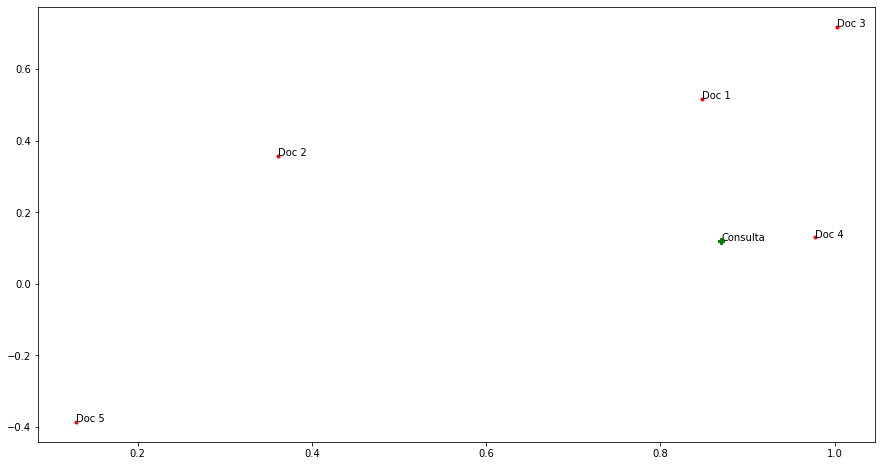

In [ ]:
# Grafico de ck y qk
import matplotlib.pyplot as plt

doc1=ck[0]
doc2=ck[1]
doc3=ck[2]
doc4=ck[3]
doc5=ck[4]
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(doc1[0],doc1[1], 'ro', marker=".")
plt.plot(doc2[0],doc2[1], 'ro', marker=".")
plt.plot(doc3[0],doc3[1], 'ro', marker=".")
plt.plot(doc4[0],doc4[1], 'ro', marker=".")
plt.plot(doc5[0],doc5[1], 'ro', marker=".")
plt.text(doc1[0],doc1[1],'Doc 1')
plt.text(doc2[0],doc2[1],'Doc 2')
plt.text(doc3[0],doc3[1],'Doc 3')
plt.text(doc4[0],doc4[1],'Doc 4')
plt.text(doc5[0],doc5[1],'Doc 5')
qt=qk[:2]
plt.plot(qt[0],qt[1], 'g', marker="P")
plt.text(qt[0],qt[1],'Consulta')

plt.show()

## Ejercicio 4

Obtenga los 4 documentos más relevantes de un cuerpo de texto considerando la consulta `"Organization University of Maryland engine"`. Para este ejercicio se deberá usar la librería `gensim`. Se deberá implementar las siguientes tareas:
- tokenización
- stop word removal
- lematización
- stemming
- representación mediante tf-idf
- creación del modelo LSI

Para este ejercicio, se deberá crear el modelo LSI con un `k=1000` (si el alumno desea, puede obtener buscar un `k` más óptimo).

Finalmente, con un LSI entrenado con `k=2`, graficar los documentos y la consulta en un espacio 2-dimensional.

In [ ]:
# el siguiente código, carga el dataset `20newsgroups` del paquete sklearn y realiza una limpieza simple inicial
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

data = newsgroups_train.data
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

documents_train = data
document_test = "Organization University of Maryland engine"  # documento de búsqueda

# inserte su código aquí

In [ ]:
# Tokenización
tokenized_data = []

for doc in data:
    tokenized_data.append(doc.split(' '))


# Remove StopWords
filtered_docs = []
for doc_tokens in tokenized_data:
    filtered_doc = []   
    for w in doc_tokens: 
        if w not in stop_words: 
            filtered_doc.append(w) 
    filtered_docs.append(filtered_doc)


# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_docs = []
for doc_tokens in filtered_docs:
    lemma_word = []
    for w in doc_tokens:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    lemmatized_docs.append(lemma_word)

# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_docs = []
for doc_tokens in lemmatized_docs:
    stemmed_word = []
    for w in doc_tokens:
        rootWord = ps.stem(w)
        stemmed_word.append(rootWord)
    stemmed_docs.append(stemmed_word)
cleaned_docs=stemmed_docs  

# Representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = []
for doc in stemmed_docs:
    corpus.append(' '.join(doc))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# LSA
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel

# genera el diccionario de términos y la matriz de términos
dictionary = corpora.Dictionary(cleaned_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_docs]

In [ ]:
# generate LSA model, 1000 topics
number_of_topics = 1000
lsamodel_1000 = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)

In [ ]:
# generate LSA model, 2 topics
number_of_topics = 2
lsamodel_2 = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)

In [ ]:
# Encontrar 4 docs, con la query

# Definir la matriz de similaridad
from gensim import similarities
index = similarities.MatrixSimilarity(lsamodel_1000[doc_term_matrix])

# Document test en el espacio LSI
vec_bow = dictionary.doc2bow(document_test.lower().split())
vec_lsi = lsamodel_1000[vec_bow]

# Encontrar documentos similares
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

for doc_position, doc_score in sims[:4]:
    print(doc_score, documents_train[doc_position])

0.70944935 From: (Robert Lipman) Subject: Call for presentations: Navy SciViz/VR seminar Reply-To: (Robert Lipman) Organization: Carderock Division, NSWC, Bethesda, MD Lines: 74 ********************************************************************** 2ND CALL FOR PRESENTATIONS NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR Tuesday, June 22, 1993 Carderock Division, Naval Surface Warfare Center (formerly the David Taylor Research Center) Bethesda, Maryland ********************************************************************** SPONSOR: NESS (Navy Engineering Software System) is sponsoring a one-day Navy Scientific Visualization and Virtual Reality Seminar. The purpose of the seminar is to present and exchange information for Navy-related scientific visualization and virtual reality programs, research, developments, and applications. PRESENTATIONS: Presentations are solicited on all aspects of Navy-related scientific visualization and virtual reality. All current work, works-in-p

In [ ]:
# Query en el modelo con k=2

# Definir la matriz de similaridad
from gensim import similarities
index = similarities.MatrixSimilarity(lsamodel_2[doc_term_matrix])

# Document test en el espacio LSI
vec_bow = dictionary.doc2bow(document_test.lower().split())
vec_lsi = lsamodel_2[vec_bow]

# Encontrar documentos similares
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

similar_docs = sims[:4]
for doc_position, doc_score in sims[:4]:
    print(doc_score, documents_train[doc_position])


1.0 From: (Eric Bosco) Subject: Windows 3.1 keeps crashing: Please HELP Nntp-Posting-Host: monica.us.oracle.com Reply-To: Organization: Oracle Corp., Redwood Shores CA X-Disclaimer: This message was written by an unauthenticated user at Oracle Corporation. The opinions expressed are those of the user and not necessarily those of Oracle. Lines: 41 As the subjects says, Windows 3.1 keeps crashing (givinh me GPF) on me of late. It was never a very stable package, but now it seems to crash every day. The worst part about it is that it does not crash consistently: ie I cant reproduce crashes, and they are not always GPFs in the same application. Sometimes I can recover by simply closing the application that caused an error, but other times, windows acts very strange, and I need to re-boot. Some background: I have a Leading Edge 486sx25 with Phoenix BIOS. When I first got it it had 4Mg of memory. It ran windows fine (not too many GPFs). Then, a couple of weekends ago, I installed Lotus 123 f

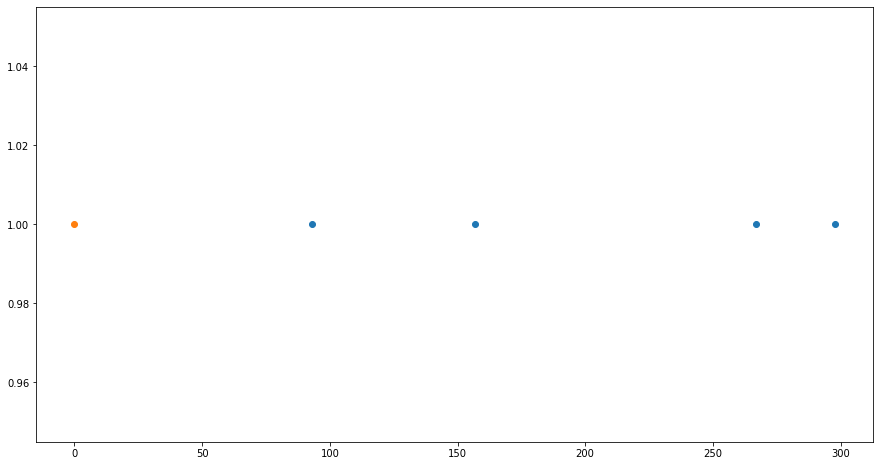

In [ ]:
# Grafica:
import matplotlib.pyplot as plt

x = []
y = []
for doc in similar_docs:
    x.append(doc[0])
    y.append(doc[1])

plt.scatter(x, y)

query_doc = (vec_lsi[0][0], vec_lsi[1][0])
plt.scatter([query_doc[0]], [query_doc[1]])

plt.show()